+--------+---------+-------+-------------+--------------------+--------------------+-----+-----+
|bedrooms|bathrooms|toilets|parking_space|               title|                town|state|price|
+--------+---------+-------+-------------+--------------------+--------------------+-----+-----+
|       6|        5|      5|            4|     Detached Duplex|             Mabushi|Abuja|4.5E8|
|       4|        5|      5|            4|   Terraced Duplexes|             Katampe|Abuja|8.0E8|
|       4|        5|      5|            4|     Detached Duplex|               Lekki|Lagos|1.2E8|
|       4|        4|      5|            6|     Detached Duplex|                Ajah|Lagos|4.0E7|
|       4|        4|      5|            2|Semi Detached Duplex|               Lekki|Lagos|7.5E7|
|       5|        5|      6|            1|     Detached Duplex|               Lekki|Lagos|4.5E8|
|       4|        5|      5|            4|     Detached Duplex|               Lekki|Lagos|6.5E7|
|       2|        2|      3|  

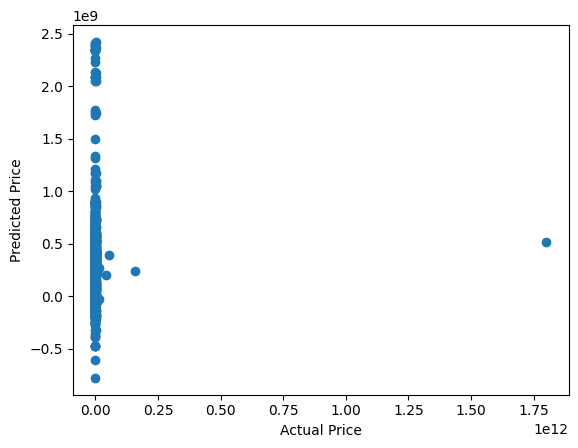

In [4]:
# Import necessary modules
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt


# Create a Spark session
spark = SparkSession.builder.appName("NigeriaHousingData").getOrCreate()
# Load the data and display them
data = spark.read.csv("C:/Users/user/Desktop/assessments/CHARLES BIG DATA/NIGERIA_HOUSING_DATA.csv", header=True,   
inferSchema=True) 

#parse data
parsed_data = data.select("bedrooms", "bathrooms", "toilets", "parking_space", "title", "town", "state", 
"price")
parsed_data.show()


# Create a feature vector separating the features from the labels
assembler = VectorAssembler(inputCols=["bedrooms", "bathrooms", "toilets", "parking_space"], 
outputCol="features")
vector_data = assembler.transform(data).select("features", "price")
vector_data.show()


# Split the dataset into 70% train and 30% test set
train_data, test_data = vector_data.randomSplit([0.7, 0.3], seed=42)


# Train a linear regression model
lr = LinearRegression(featuresCol='features', labelCol='price')
lr_model = lr.fit(train_data)


# Evaluate the model on the train set
train_predictions = lr_model.transform(train_data)
train_evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", 
metricName="mae")
train_mae = train_evaluator.evaluate(train_predictions)
train_evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", 
metricName="rmse")
train_rmse = train_evaluator.evaluate(train_predictions)
train_evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", 
metricName="mse")
train_mse = train_evaluator.evaluate(train_predictions)
print("Train MAE:", train_mae)
print("Train RMSE:", train_rmse)
print("Train MSE:", train_mse)


# Evaluate the model on the test set
test_predictions = lr_model.transform(test_data)
test_evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mae")
test_mae = test_evaluator.evaluate(test_predictions)
test_evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", 
metricName="rmse")
test_rmse = test_evaluator.evaluate(test_predictions)
test_evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="mse")
test_mse = test_evaluator.evaluate(test_predictions)
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MSE:", test_mse)


# Generate a table showing the predicted vs actual values for the test set
predictions = test_predictions.select("prediction", "price")
predictions.show()


# Generate a predicted vs actual plot for the test set
predictions = predictions.toPandas()
plt.scatter(predictions["price"], predictions["prediction"])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

# Stop the Spark session
spark.stop()